**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [2]:
# import package
import numpy as np
import pandas as pd

# baca data dari file CSV
data = pd.read_csv('.\data\insurance.csv')

# melihat beberapa data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [21]:
# Membuat variabel bebas X dan Y
X = data[['age', 'bmi', 'children']]
y = data['charges']

# Pembagian data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

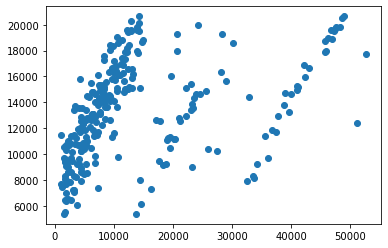

In [25]:
# Training model
import statsmodels.api as sm
import matplotlib.pyplot as plt 

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

X_train_sm = sm.add_constant(X_test)

# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Visualisasi garis regresi
plt.scatter(y_test, y_train_pred)
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [26]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung MAE
mae = mean_absolute_error(y_test, y_train_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_train_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_train_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9016.002558195334
MSE: 133189853.20376825
RMSE: 11540.790839616158
R-squared: 0.16301209866339939
